In [20]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/Gabriel/Desktop/Data Science/Python/Projeto MatLab GGI NLP/df4busline.csv")
df = df.dropna()
df.head(10)

,news,topic,business_line
0,embraer e190-e2 program development name 2019 ...,Self-awareness,Commercial
1,jet aviation announce open new teterboro hang...,Expansion,Executive
2,gmf solidify airframe capabilities new strat...,New facility,Commercial
3,unite technologies net $3252m contract f-35 d...,Contract,Military
4,boeing want double size australia central ...,Expansion,Commercial
5,airbus invest $5 billion turkey 2030 turkis...,Investment,Other
6,airbus sell 41 jet september target record fo...,Aircraft sales,Commercial
7,aar test drone aircraft inspection miami aar...,New technology,Other
8,airbus plan venture help airlines hedge reve...,New service,Commercial
9,airx world largest lineage operator airx u...,Self-awareness,Commercial


In [18]:
category_codes = {
    "Commercial": 0,
    "Executive": 1,
    "Military": 2,
    "Other": 3
}

df['business_code'] = df['business_line']
df = df.replace({'business_code':category_codes})

X_train, X_test, y_train, y_test = train_test_split(df['news'], df['business_code'], test_size=0.15, random_state=27)

ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 500

tfidf = TfidfVectorizer(encoding='utf-8', ngram_range=ngram_range, stop_words=None, lowercase=False, max_df=max_df, min_df=min_df, max_features=max_features, norm='l2', sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(633, 328)
(112, 328)


In [21]:
mnbc = MultinomialNB()
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
mnbc_pred = mnbc.predict(features_test)

In [24]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.7551342812006319


In [25]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.5714285714285714


In [26]:
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        44
           1       0.50      0.08      0.14        12
           2       0.77      0.45      0.57        22
           3       0.42      0.82      0.56        34

   micro avg       0.57      0.57      0.57       112
   macro avg       0.62      0.48      0.49       112
weighted avg       0.65      0.57      0.56       112



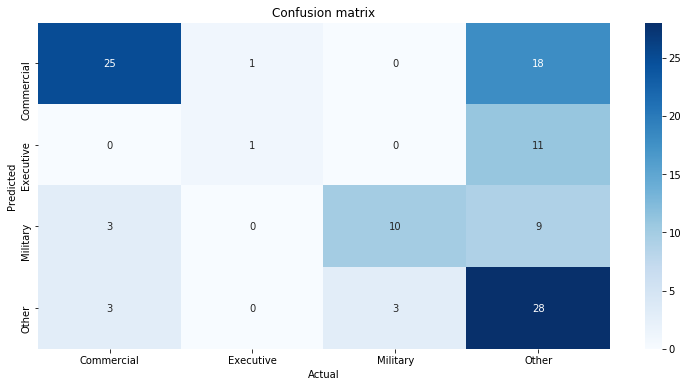

In [28]:
aux_df = df[['business_line', 'business_code']].drop_duplicates().sort_values('business_code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['business_line'].values, 
            yticklabels=aux_df['business_line'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [30]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [31]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.755134,0.571429
